<a href="https://colab.research.google.com/github/bwsi-hadr/04-Intro-to-networks/blob/master/04_Intro_to_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Networks
The study of networks investigates the relationship between discrete objects using [graphs](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))

![network_diagram](https://upload.wikimedia.org/wikipedia/commons/2/2f/Small_Network.png)

Graphs are a mathematical structure which represent a set of objects (called nodes or vertices) as well as their symmetric or asymmetric relationships (called links or edges).

They can be used to represent both physical systems (roads, pipelines, electrical grid) and abstract systems (social, collaboration, genetics).

For this course, we'll be using the python `networkx` package, which provides many useful classes and functions for representing and doing computations with networks. 

In addition, we'll be using the `osmnx` package, which will download openstreetmap road networks as `networkx` objects. There are a ton of useful examples in the [examples repo](https://github.com/gboeing/osmnx-examples).

This lecture is based off of the [osmnx-examples](https://github.com/gboeing/osmnx-examples) code and the [Automating GIS Processes](https://automating-gis-processes.github.io/2018/notebooks/L6/retrieve_osm_data.html) course.

In [21]:
import networkx as nx # need networkx >= 2.5
import osmnx as ox
import contextily as ctx 
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
import folium
import numpy as np

In [13]:
# Specify the name that is used to seach for the data
place_name = "Cambridge, MA, USA"

# Fetch OSM street network from the location
# this will take a while because there's a lot of streets
graph = ox.graph_from_place(place_name)

In [19]:
# metadata about the graph object
graph.graph

{'created_date': '2021-07-14 13:53:17',
 'created_with': 'OSMnx 1.1.1',
 'crs': 'epsg:4326',
 'simplified': True}

In [9]:
# we can save the graph to a file so that we don't have to
# wait for it to download again next time
ox.io.save_graphml(graph, 'cambridge_osmnx.graphml')

In [2]:
# loading graph from a file
graph = ox.io.load_graphml('cambridge_osmnx.graphml')

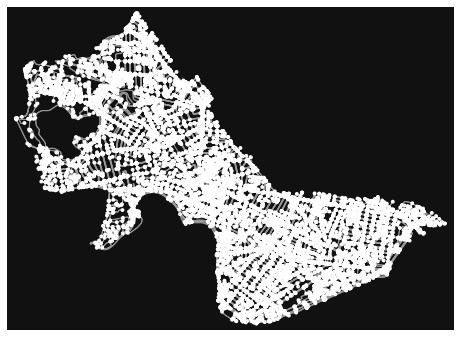

In [4]:
# Let's take a look at the graph
fig, ax = ox.plot_graph(graph)

In [8]:
# we can project the graph into epsg:3857 so that units are in meters
# using the .project_graph() function; 
# by default, osmnx graphs are created in WGS84, (epsg:4326)
graph_proj = ox.project_graph(graph, to_crs='epsg:3857')

In [10]:
# we can then convert the projected graph to a geodataframe
graph_nodes_gdf, graph_edges_gdf = ox.graph_to_gdfs(graph_proj)
graph_nodes_gdf.crs

In [11]:
graph_nodes_gdf

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
61175693,5.220801e+06,-7.917964e+06,3,-71.128276,42.398103,NaN,POINT (-7917963.521 5220801.149)
3895955644,5.220746e+06,-7.918006e+06,3,-71.128660,42.397735,NaN,POINT (-7918006.179 5220745.661)
61182955,5.218854e+06,-7.916612e+06,4,-71.116133,42.385184,traffic_signals,POINT (-7916611.679 5218853.870)
7893597583,5.218853e+06,-7.916601e+06,4,-71.116033,42.385178,crossing,POINT (-7916600.536 5218853.056)
7893597542,5.218865e+06,-7.916612e+06,4,-71.116138,42.385255,crossing,POINT (-7916612.247 5218864.676)
...,...,...,...,...,...,...,...
8859547406,5.214344e+06,-7.915254e+06,3,-71.103937,42.355250,NaN,POINT (-7915254.094 5214343.627)
8859547405,5.214358e+06,-7.915223e+06,3,-71.103662,42.355342,NaN,POINT (-7915223.403 5214357.516)
8859547407,5.214302e+06,-7.915236e+06,1,-71.103773,42.354975,NaN,POINT (-7915235.770 5214302.172)


In [16]:
graph_edges_gdf

osmid lanes                 name  \
u          v          key                                                    
61175693   3895955644 0    [8615932, 386272429]     2       Elmwood Street   
3895955644 8515679674 0               297244215   NaN  Alewife Linear Park   
           1092759643 0               297244215   NaN  Alewife Linear Park   
           61175693   0    [8615932, 386272429]     2       Elmwood Street   
61182955   7893597583 0                 8615747     1        Forest Street   
...                                         ...   ...                  ...   
8859547407 8859547406 0               957465385   NaN                  NaN   
8859547414 8859547416 0               957465388   NaN                  NaN   
           8859547415 0               957465388   NaN                  NaN   
           8859547411 0               957465387   NaN                  NaN   
8859547416 8859547414 0               957465388   NaN                  NaN   

                                   highway width  oneway  length  \
u          v          key                                          
61175693   3895955644 0    [path, service]  12.2   False  51.634   
3895955644 8515679674 0           cycleway   NaN   False  62.071   
           1092759643 0           cycleway   NaN   False  52.446   
           61175693   0    [path, service]  12.2   False  51.634   
61182955   7893597583 0        residential  12.2    True   8.243   
...                                    ...   ...     ...     ...   
8859547407 8859547406 0            footway   NaN   False  33.457   
8859547414 8859547416 0            footway   NaN   False   8.920   
           8859547415 0            footway   NaN   False  10.712   
           8859547411 0            footway   NaN   False  94.966   
8859547416 8859547414 0            footway   NaN   False   8.920   

                                                                    geometry  \
u          v          key                                                      
61175693   3895955644 0    LINESTRING (-7917963.521 5220801.149, -7917972...   
3895955644 8515679674 0    LINESTRING (-7918006.179 5220745.661, -7917922...   
           1092759643 0    LINESTRING (-7918006.179 5220745.661, -7918045...   
           61175693   0    LINESTRING (-7918006.179 5220745.661, -7918002...   
61182955   7893597583 0    LINESTRING (-7916611.679 5218853.870, -7916600...   
...                                                                      ...   
8859547407 8859547406 0    LINESTRING (-7915235.770 5214302.172, -7915254...   
8859547414 8859547416 0    LINESTRING (-7915186.478 5214425.515, -7915181...   
           8859547415 0    LINESTRING (-7915186.478 5214425.515, -7915192...   
           8859547411 0    LINESTRING (-7915186.478 5214425.515, -7915243...   
8859547416 8859547414 0    LINESTRING (-7915181.402 5214414.548, -7915186...   

                          maxspeed service  ref access tunnel bridge junction  
u          v          key                                                      
61175693   3895955644 0        NaN     NaN  NaN    NaN    NaN    NaN      NaN  
3895955644 8515679674 0        NaN     NaN  NaN    NaN    NaN    NaN      NaN  
           1092759643 0        NaN     NaN  NaN    NaN    NaN    NaN      NaN  
           61175693   0        NaN     NaN  NaN    NaN    NaN    NaN      NaN  
61182955   7893597583 0     20 mph     NaN  NaN    NaN    NaN    NaN      NaN  
...                            ...     ...  ...    ...    ...    ...      ...  
8859547407 8859547406 0        NaN     NaN  NaN    NaN    NaN    NaN      NaN  
8859547414 8859547416 0        NaN     NaN  NaN    NaN    NaN    NaN      NaN  
           8859547415 0        NaN     NaN  NaN    NaN    NaN    NaN      NaN  
           8859547411 0        NaN     NaN  NaN    NaN    NaN    NaN      NaN  
8859547416 8859547414 0        NaN     NaN  NaN    NaN    NaN    NaN      NaN  

[43723 rows x 15 columns]

In [14]:
# we can also get a gdf for the footprint of the place
place_footprint = ox.geocode_to_gdf(place_name)
graph_area = place_footprint.to_crs('epsg:3857')
graph_area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-7921539.370 5219058.583, -7921287.9...",42.404259,42.352402,-71.063984,-71.160399,258578553,relation,1933745,42.3751,-71.105616,"Cambridge, Middlesex County, Massachusetts, Un...",boundary,administrative,0.824277


<AxesSubplot:>

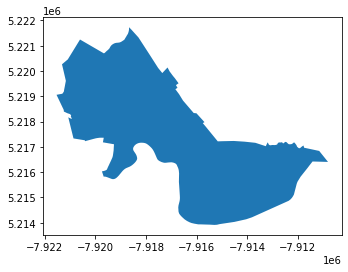

In [15]:
graph_area.plot()

## Exercises
What is the total area of cambridge in sq meters?

How many street segments in Cambridge are longer than 100 meters?

## Road network statistics

In [17]:
# we can get basic stats about the network:
ox.stats.basic_stats(graph_proj)

{'n': 14547,
 'm': 43723,
 'k_avg': 6.011273802158521,
 'edge_length_total': 1565662.301000002,
 'edge_length_avg': 35.80866594241022,
 'streets_per_node_avg': 3.263971952979996,
 'streets_per_node_counts': {0: 0,
  1: 949,
  2: 42,
  3: 7871,
  4: 5611,
  5: 56,
  6: 16,
  7: 1,
  8: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.06523681858802502,
  2: 0.0028871932357187047,
  3: 0.541073760912903,
  4: 0.38571526775280124,
  5: 0.0038495909809582733,
  6: 0.0010998831374166495,
  7: 6.87426960885406e-05,
  8: 6.87426960885406e-05},
 'intersection_count': 13598,
 'street_length_total': 850983.9579999975,
 'street_segment_count': 23600,
 'street_length_avg': 36.05864228813549,
 'circuity_avg': 0.7735280851865178,
 'self_loop_proportion': 0.0017372881355932203}

Circuity is the ratio of network distance (distance traveled along roads) to euclidean distance (straight line). Higher circuity means greater inefficiency in traveling along the roads.

Check the [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats) for more info about each statistic

In [ ]:
# if you pass in the area, you can get density info
area_cambridge_sqm = graph_area['geometry'].area
ox.basic_stats(graph_proj, area=area_cambridge_sqm)

## Getting data other ways
In the above example, we used the name of a place to get the data that we wanted.

However, there are other ways to specify locations which may be more convenient.

For example, you can get [graphs from address](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_address), [bounding box](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_bbox), [points](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_bbox), or [shapely polygon object](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_polygon)

The types of networks you can get are:

-    `drive` - get drivable public streets (but not service roads)
-    `drive_service` - get drivable streets, including service roads
-    `walk` - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
-    `bike` - get all streets and paths that cyclists can use
-    `all` - download all non-private OSM streets and paths
-    `all_private` - download all OSM streets and paths, including private-access ones



In [23]:
# Coordinates of the MIT main campus in Decimal Degrees
coordinates = [(-71.092562, 42.357602), (-71.080155, 42.361553),
               (-71.089817, 42.362584), (-71.094688, 42.360198)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# convert to meters from latlong by projecting to epsg:3857
poly_m, poly_crs_m = ox.projection.project_geometry(poly, to_crs='epsg:3857')

# put a buffer of 1 mile (1609.34 m) to get everything w/in 1 mile
poly_with_buffer_m = poly_m.buffer(1609.34)

# convert back to lat-long
poly_with_buffer_ll, poly_crs_ll = ox.projection.project_geometry(poly_with_buffer_m, 
                                                        crs=poly_crs_m, 
                                                        to_crs='epsg:4326', 
                                                        to_latlong=True)

# get all walkable roads within poly
walkable_roads_near_mit = ox.graph_from_polygon(poly_with_buffer_ll, 
                                       network_type='walk',
                                       clean_periphery=True)



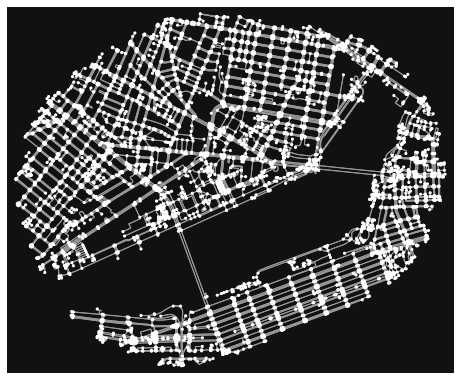

In [24]:
# let's plot it
fig, ax = ox.plot_graph(walkable_roads_near_mit, figsize=(8,10), node_size=10)

In [ ]:
# example of a road
all_edges_list = list(walkable_roads_near_mit.edges) # put the id for each edge in a list
print(all_edges_list[0]) # id of first edge
print(walkable_roads_near_mit.edges[all_edges_list[0]]) # get details for first edge

In [ ]:
# get attribute for all edges
walkable_roads_near_mit.edges(data='name')

In [ ]:
# example of a node (intersection)
all_nodes_list = list(walkable_roads_near_mit.nodes)
print(all_nodes_list[0]) # id of first node
print(walkable_roads_near_mit.nodes[all_nodes_list[0]]) # details for first node

In [ ]:
# get attribute for all nodes
walkable_roads_near_mit.nodes(data='street_count')

## Exercise

How many walkable roads near MIT are longer than 100 meters?

## Routing
We can get the node closest to a point using the `ox.distance.nearest_node` function.

In [ ]:
orig_node = ox.distance.nearest_nodes(walkable_roads_near_mit, -71.092562, 42.357602)

# let's calculate the route to a random destination node
rand_node = np.random.choice(walkable_roads_near_mit.nodes)
print(walkable_roads_near_mit[rand_node])
route = ox.distance.shortest_path(walkable_roads_near_mit, 
                         orig_node, rand_node, 
                         weight='length')
fig, ax = ox.plot_graph_route(walkable_roads_near_mit, route, node_size=0)
shortest_path_length = nx.shortest_path_length(walkable_roads_near_mit, orig_node, 
                              rand_node, weight='length')
print(f'length of shortest walkable path from node {orig_node} to {rand_node} is {shortest_path_length:.2f}m') # the {:.2f} syntax means round off to 2 digits after decimal pt

The `shortest_path` function in networkx uses [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) to efficiently calculate the shortest path between two nodes. The networkx library also provides many other useful functions on graphs; for instance, the [Floyd-Warshall algorithm](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm), which efficiently computes the shortest paths between all pairs of nodes, and the [A* (A-star) algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm), which is similar to Dijkstra's algorithm, except it runs faster by taking advantage of a distance "approximation" that can be calculated between two nodes without knowing the shortest path outright. Check out these links if you want to learn more about these algorithms, and check out the [networkx documentation](https://networkx.github.io/documentation/networkx-2.4/index.html) if you want to learn more about all the methods networkx provides.

## Building outlines
We can get the footprint of objects such as buildings as geodataframes with `osmnx`. Here we'll get the building footprints near MIT.

In [ ]:
# we can get the footprints of objects within this poly
building_footprints = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'building':True})


You can perform any query using OSM tags: https://wiki.openstreetmap.org/wiki/Map_features

Note that if you include multiple tags, it gets the **union** of the results, not the intersection

In [ ]:
road_footprints = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'highway':True}) # get roads with geometry
# note that most roads do not have footprint information

In [ ]:
# project into UTM for info in meters
building_footprints_proj = ox.projection.project_gdf(building_footprints)
road_footprints_proj = ox.projection.project_gdf(road_footprints)
building_footprints_proj

In [ ]:
# column names
building_footprints_proj.columns.values

In [ ]:
# drop rows where there's no shape info
building_footprints_proj = building_footprints_proj.dropna(subset=['geometry'])
road_footprints = road_footprints.dropna(subset=['geometry'])

In [ ]:
fig, ax = ox.plot_footprints(building_footprints_proj)

In [ ]:
# plot roads with footprints
fig, ax = ox.plot_footprints(road_footprints_proj) # note that this is only a small subset of all roads

In [ ]:
# save the geodataframe to a file to persist
# can choose to write only a subset of columns if you want
building_footprints_proj[['description', 'operator', 'railway', 'geometry', 'attribution',
       'source', 'addr:city', 'addr:housenumber', 'addr:postcode',
       'addr:state', 'addr:street', 'amenity']].to_file('buildings_around_mit.geojson', driver='GeoJSON')


## Exercises
Plot the walkable roads and buildings in the area near MIT in the same figure. The `osmnx` plotting features use matplotlib on the backend. Check [the documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.plot.plot_graph) for more formatting options for plotting

Now, go back to one of the previous exercises and plot all the nodes on the periphery of Cambridge and the roads in Cambridge in the same figure.

## Interactive graph with folium
Folium is a library which creates interactive web maps. This can be used to visualize and explore the data. However, it is slower to load and cannot scale to as large networks as the standard matplotlib plotting

In [ ]:
folium_graph = ox.plot_graph_folium(walkable_roads_near_mit)
folium_graph

In [ ]:
ox.plot_route_folium(walkable_roads_near_mit, route, route_map = folium_graph, color='#ff0000')

## Get places of interest
OSM can also give places of interest, like restaurants, pharmacies, hospitals, and toilets. The full list is available [here](https://wiki.openstreetmap.org/wiki/Key:amenity).

Let's look at the POIs near MIT.

In [ ]:
fast_food = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'amenity': 'fast_food'})
fast_food

In [ ]:
walkable_nodes, walkable_edges = ox.graph_to_gdfs(walkable_roads_near_mit)

In [ ]:
# plot roads, buildings, and fast_food
fig, ax = plt.subplots(1,1, figsize=[20,20])
building_footprints.plot(ax=ax)
walkable_edges.plot(ax=ax, color='black')
fast_food.plot(ax=ax, color='#FF0099', markersize=50)
plt.show()

# Exercise
In groups, pick a location, ask an interesting question, do an analysis to answer that question.
